## Issue: reading a POP dataset, longitude and latitude are 2D arrays

POP output is typically on a displaced-pole grid (the grid is rotated so that the north pole is centered in Greenland) - computation can't be done on a regular lat-lon grid because the north pole is over ocean and we don't want grid convergence in the computational domain. That means we don't want to plot according to the `nlat` and `nlon` dimensions, we want the latitude to be `TLAT(nlat,nlon)` and the longitude to be `TLONG(nlat,nlon)`.

#### Environment

There's an `environment.yaml` file to create a conda environment (I call it "canopy-issue") with the following:

* python 3.6.6
* Cartopy 0.16.0
* matplotlib 2.2.2
* xarray 0.10.8
* jupyterlab 0.33.4

Those were the latest versions available of each package as of Aug 2, 2018.

#### Notebook walk-through

Prior to creating this ticket, I created a dataset that contains a 2D variable (`SSH`: sea surface height) on the native POP grid. The dataset also includes the 2D variables `TLAT` and `TLON`, and I read the whole thing in with `xarray`.

In [1]:
import xarray as xr

ds = xr.open_dataset('./POP_SSH.nc')

import numpy as np
np.amin(ds['TLONG'])

<xarray.DataArray 'TLONG' ()>
array(0.146222)

Following an example from the [xarray documentation](http://xarray.pydata.org/en/stable/examples/multidimensional-coords.html#plotting), I brought in `cartopy` and `matplotlib`. This looks great, except for the seam running down the middle. How do I tell `pcolormesh()` that the data is ~~periodic~~ cyclic in `x`? I wish I could go back to 2014 and comment on [Cartopy issue #398](https://github.com/SciTools/cartopy/issues/398), because `add_cyclic_point()` would be helpful here but it doesn't work with 2D coordinates.

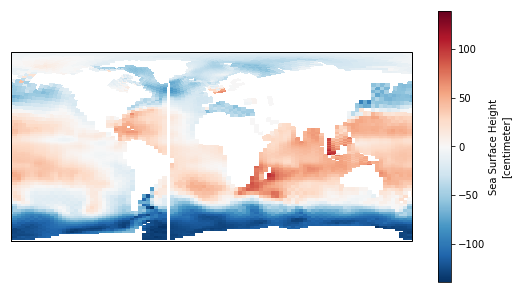

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

plt.figure(figsize=(9,5));
ax = plt.axes(projection=ccrs.PlateCarree());
ds['SSH'].plot.pcolormesh(x='TLONG', y='TLAT', transform=ccrs.PlateCarree());

# ax.coastlines();
# plt.tight_layout();

If I adjust the central longitude of the projection, though, I can shift the seam off the map! (There's still a hint of it on the far left of the plot, but that's okay.)

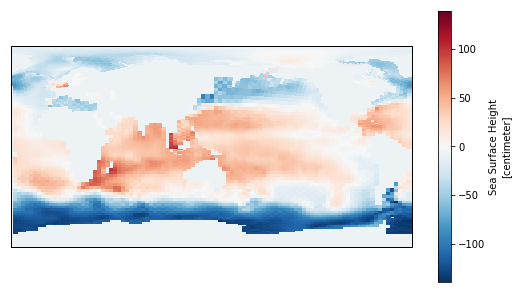

In [3]:
plt.figure(figsize=(9,5));
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=141));
ds['SSH'].plot.pcolormesh(x='TLONG', y='TLAT', transform=ccrs.PlateCarree());

This is good for a quick eyeball check of the data, but ideally the central longitude would be chosen such that the split between the left and right side of the graph occurs over east Asia rather than in the Atlantic Ocean (or any of the ocean basins, for that matter). In this case, though, the seam is a big distraction.

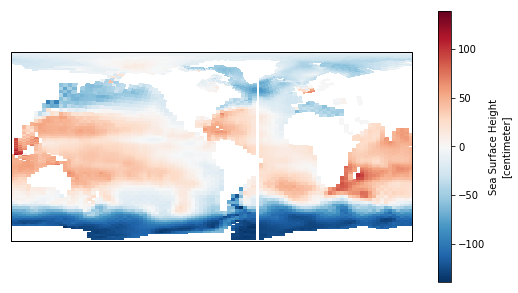

In [4]:
plt.figure(figsize=(9,5));
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=280));
ds['SSH'].plot.pcolormesh(x='TLONG', y='TLAT', transform=ccrs.PlateCarree());